In [292]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size=5 color=red>04_tensorflow_v1_feat.스케일조절</font>

# 1. tensorflow v2.xx 에서 v1사용하기

In [3]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()  # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

## 1.1. Tensorflow

- 데이터 흐름를 그래프(Tensor 객체의 흐름)
- 이 그래프는 node(상수, 변수 , 연산)의 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [11]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [12]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)

node3 = tf.add(node1, node2)

sess = tf.Session()

print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [13]:
# 타입 변경
node1 = tf.constant(np.array([1, 2, 3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [14]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [16]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2])  # 평균이 0, 표준편차가 1인 난수 실수 2개 (정규분포를 이루는 난수)
b = tf.random_normal([1])

sess = tf.Session()
sess.run([a, b])

[array([-1.0298789 ,  0.12366588], dtype=float32),
 array([0.3535142], dtype=float32)]

In [25]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([1.4015666], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression 을 구현

## 2.1. 입력(독립)변수 x가 1개, 타켓(종속)변수 y가 1개

In [28]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])

# weigh의 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis(예측값)
H = W * x + b

# cost function(손실함수 = mse ; 최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))
'''
학습목적 = cost가 최소화 되는 W, b를 찾아내는 것
cost 는 2차 함수이므로 곡선그래프, 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
→ Gradient Descent Optimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)  # 미분
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()

# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())

# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    
    if step%200 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))
            

0번쨰 cost : 2.2897613048553467, W : [0.35435513], b : [1.0525901]
200번쨰 cost : 0.004378287587314844, W : [0.92333394], b : [1.1742799]
400번쨰 cost : 0.0016718626720830798, W : [0.95262486], b : [1.1076949]
600번쨰 cost : 0.0006383901927620173, W : [0.9707252], b : [1.0665486]
800번쨰 cost : 0.00024376895453315228, W : [0.98191], b : [1.0411232]
1000번쨰 cost : 9.308511653216556e-05, W : [0.98882127], b : [1.0254117]
1200번쨰 cost : 3.554214708856307e-05, W : [0.9930925], b : [1.0157025]
1400번쨰 cost : 1.357246219413355e-05, W : [0.9957314], b : [1.0097034]
1600번쨰 cost : 5.1831561904691625e-06, W : [0.9973622], b : [1.0059963]
1800번쨰 cost : 1.9791875729424646e-06, W : [0.99836993], b : [1.0037055]
2000번쨰 cost : 7.558618904113246e-07, W : [0.9989926], b : [1.00229]
2200번쨰 cost : 2.88811406790046e-07, W : [0.99937725], b : [1.0014153]
2400번쨰 cost : 1.1048596348928186e-07, W : [0.9996149], b : [1.0008755]
2600번쨰 cost : 4.2422112045414906e-08, W : [0.9997614], b : [1.0005425]
2800번쨰 cost : 1.627959989

In [30]:
# 최종적으로 나온 희귀식 : H = W * x + b
sess.run([W, b])

[array([0.9999891], dtype=float32), array([1.0000248], dtype=float32)]

In [35]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(0.9999891, 1.0000248)

In [38]:
def predict(x):
    return W_[0] * x + b_[0]

In [42]:
input_x = int(input('입력값은 ?'))
print('예측값은', predict(input_x))

입력값은 ?3
예측값은 3.999992072582245


## 2.2. predict를 위한 placeholder 이용

- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드


In [48]:
# x = np.array([1, 2, 3])
x = tf.placeholder(tf.float16)
H = 1 * x + 1
sess = tf.Session()
sess.run(H, feed_dict={x: 5})
sess.run(H, feed_dict={x: np.array([1, 2, 3])})

array([2., 3., 4.], dtype=float16)

In [51]:
# H = 2x + 3
x_data = np.array([1, 2, 3, 5, 8])
y_data = np.array([3, 5, 7, 11, 17])

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화

# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data, y:y_data})
    
    if step%200 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))

0번쨰 cost : 223.6167449951172, W : [0.396142], b : [-0.5246403]
200번쨰 cost : 0.04167274385690689, W : [2.0694227], b : [0.62893605]
400번쨰 cost : 0.00409886846318841, W : [2.0217726], b : [0.8836266]
600번쨰 cost : 0.0004031683783978224, W : [2.0068283], b : [0.96350265]
800번쨰 cost : 3.96532668673899e-05, W : [2.0021415], b : [0.9885538]
1000번쨰 cost : 3.90126933780266e-06, W : [2.0006716], b : [0.99640995]
1200번쨰 cost : 3.8388907341868617e-07, W : [2.0002108], b : [0.9988737]
1400번쨰 cost : 3.786517410730994e-08, W : [2.000066], b : [0.99964654]
1600번쨰 cost : 3.739216936082812e-09, W : [2.0000207], b : [0.99988925]
1800번쨰 cost : 3.793161340581719e-10, W : [2.0000067], b : [0.9999645]
2000번쨰 cost : 5.184119800105691e-11, W : [2.0000026], b : [0.99998695]
2200번쨰 cost : 2.060005464821213e-11, W : [2.0000017], b : [0.99999213]
2400번쨰 cost : 2.060005464821213e-11, W : [2.0000017], b : [0.99999213]
2600번쨰 cost : 2.060005464821213e-11, W : [2.0000017], b : [0.99999213]
2800번쨰 cost : 2.060005464821

In [53]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [54]:
sess.run(H, feed_dict={x: np.array([5, 6, 7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3. scale 이 다른 데이터의 linear regression 구현 (scale 조정 X)

In [101]:
# H = 2x + 3
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화

# 5000번 학습
for step in range(1000):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data, y:y_data})
    
    if step%200 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))

0번쨰 cost : 3985.20654296875, W : [7.7205787], b : [2.1635752]
200번쨰 cost : 83.89234924316406, W : [10.146583], b : [-0.21805583]
400번쨰 cost : 83.51993560791016, W : [10.255428], b : [-1.0239772]
600번쨰 cost : 83.48575592041016, W : [10.288396], b : [-1.2680846]
800번쨰 cost : 83.4826431274414, W : [10.298382], b : [-1.3420228]


In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4. scale 이 다른 데이터의 linear regression을 구현 (scale 조정 ㅇ)

### 1) scale 을 맞추기 : 모든 데이터를 일정 범위내로 조정

- normalization (정규화) : 0 ~ 1로 조정

                            X - Xmin
    - normalization = --------------------------
                            Xmax - Xmin
    - 위의 식을 써도 되지만, 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)                    
                        
- standardization (표준화) : 평균0, 표준편차 1로 조정

                            X - Xmean(평균)
    - standardization = --------------------------
                            Xstd(표준편차)
    - 위의 식을 써도 되지만, 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)                    

In [107]:
# 라이브러리를 쓰지 않고, 정규화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])

scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())

print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [108]:
# 라이브러리를 쓰고 정규화 (MinmaxScaler 이용)
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()  # x_data를 정규화시킬 객체

# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)

scaler_y = MinMaxScaler()  # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)

np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 15000 학습
for step in range(15001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x: scaled_x_data,
                                             y: scaled_y_data
                                         })

    if step % 500 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val,
                                                      b_val))

0번쨰 cost : 0.28556233644485474, W : [-0.2977222], b : [0.5069252]
500번쨰 cost : 0.18581125140190125, W : [-0.09262364], b : [0.57477194]
1000번쨰 cost : 0.14574575424194336, W : [0.04605191], b : [0.55210006]
1500번쨰 cost : 0.11721716821193695, W : [0.1568849], b : [0.50807774]
2000번쨰 cost : 0.09488210827112198, W : [0.25191557], b : [0.46205106]
2500번쨰 cost : 0.07721078395843506, W : [0.33545876], b : [0.4191211]
3000번쨰 cost : 0.06321386247873306, W : [0.4095176], b : [0.38034752]
3500번쨰 cost : 0.05212609842419624, W : [0.475347], b : [0.3456757]
4000번쨰 cost : 0.04334265738725662, W : [0.5339137], b : [0.31476995]
4500번쨰 cost : 0.03638466075062752, W : [0.5860333], b : [0.28724912]
5000번쨰 cost : 0.03087274357676506, W : [0.6324198], b : [0.2627507]
5500번쨰 cost : 0.026506343856453896, W : [0.6737053], b : [0.24094495]
6000번쨰 cost : 0.023047424852848053, W : [0.71045065], b : [0.2215367]
6500번쨰 cost : 0.020307384431362152, W : [0.7431552], b : [0.20426254]
7000번쨰 cost : 0.018136797472834587

In [109]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
# scaled_input
scaled_input = scaler_x.transform(np.array([[2], [3]]))
scaled_input
print('모델 예측 위한 입력 :', scaled_input, sep='\n')
# scaled_output
scaled_output = sess.run(H, feed_dict={x: scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')

print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.19166636]
 [0.29959264]]
결과 :
[[20.633307]
 [30.562523]]


In [110]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x: scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

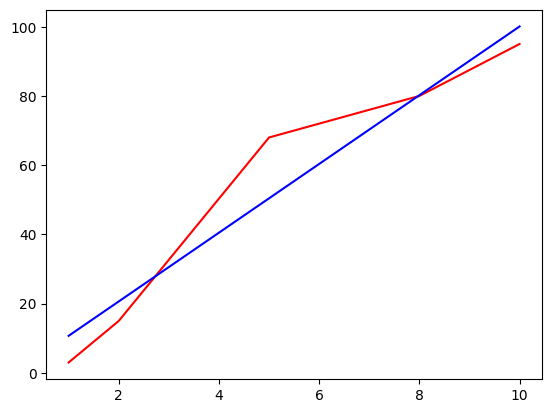

In [111]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [120]:
# 라이브러리를 쓰고 표준화 (StandardScaler 이용)
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체

scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)

# print(np.column_stack([x_data, y_data]))
# print(np.column_stack([scaled_x_data, scaled_y_data]))

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 15000 학습
for step in range(15001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x: scaled_x_data,
                                             y: scaled_y_data
                                         })

    if step % 500 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val,
                                                      b_val))

0번쨰 cost : 9.610828399658203, W : [-2.0292697], b : [0.724889]
500번쨰 cost : 1.3523017168045044, W : [-0.13343576], b : [0.2664049]
1000번쨰 cost : 0.23686687648296356, W : [0.563305], b : [0.09790672]
1500번쨰 cost : 0.08621138334274292, W : [0.8193649], b : [0.03598184]
2000번쨰 cost : 0.06586316227912903, W : [0.9134699], b : [0.01322374]
2500번쨰 cost : 0.06311487406492233, W : [0.9480539], b : [0.00485988]
3000번쨰 cost : 0.06274367868900299, W : [0.9607642], b : [0.00178607]
3500번쨰 cost : 0.0626935213804245, W : [0.9654354], b : [0.00065641]
4000번쨰 cost : 0.06268675625324249, W : [0.9671523], b : [0.00024125]
4500번쨰 cost : 0.06268583238124847, W : [0.96778315], b : [8.8667846e-05]
5000번쨰 cost : 0.06268572062253952, W : [0.9680154], b : [3.259456e-05]
5500번쨰 cost : 0.06268570572137833, W : [0.96810013], b : [1.1986471e-05]
6000번쨰 cost : 0.06268569827079773, W : [0.9681325], b : [4.413136e-06]
6500번쨰 cost : 0.06268569827079773, W : [0.96813506], b : [1.6381791e-06]
7000번쨰 cost : 0.06268569082

In [121]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
# scaled_input
scaled_input = scaler_x.transform(np.array([[2], [3]]))
scaled_input
print('모델 예측 위한 입력 :', scaled_input, sep='\n')
# scaled_output
scaled_output = sess.run(H, feed_dict={x: scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')

print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측 위한 입력 :
[[-0.93313895]
 [-0.64153303]]
모델 예측 결과 :
[[-0.9034045 ]
 [-0.62109053]]
결과 :
[[19.2318  ]
 [29.534367]]


In [122]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x: scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

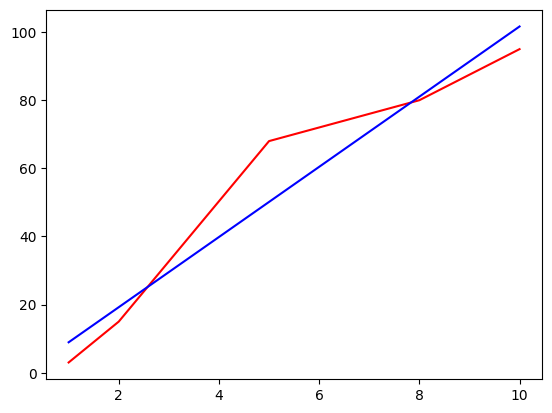

In [123]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2.5. 입력(독립)변수 x가 3개, 타켓(종속)변수 y가 1개 (csv → array)

In [189]:
# 방법1 : csv → array
import numpy as np
# data = np.loadtxt('./data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8') # 결측치와, header가 없어야 함
# data # → 에러 발생

data = np.genfromtxt('data/ozone.csv',
                     delimiter=',',
                     skip_header=1,
                     missing_values='NA',
                     filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [190]:
# 방법2 : csv 파일 → dataFrame → 결측치처리 → numpy array → 머신러닝
# 1. csv 를 데이터프레임으로 읽기
import pandas as pd
data = pd.read_csv('./data/ozone.csv')
# data.head()
data.info() # Ozone , Solar.R 열에만 결측치 
data.isna().sum() # 열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [191]:
# 2. 결측치 처리
# 결측치 처리방법1 : 2-1. 결측치가 있는 행을 제거
# data.dropna(how='all') # 모두 
# data.dropna(how='any', axis=0).shape

# data = data.dropna(how='any', axis=0) 
# data.dropna(how='any', axis=0, inplace=True) 


# 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)
data.mean() # 열별평균
# data.fillna(value=data.mean(), inplace=True)

# 결측치 처리 방법2 : 결측치 대체(월별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean() # 월별평균
display(mean_data)

print('6월에 Ozone으로 대체할 값 :', mean_data.loc[6, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


6월에 Ozone으로 대체할 값 : 29.444444444444443


In [192]:
# 결측치가 있는 데이터
# data['Ozone'].isna()
# data['Solar.R'].isna()
data[data['Ozone'].isna() | data['Solar.R'].isna()].head()

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
9,NaN,194.0,8.6,69,5,10
10,7.0,NaN,6.9,74,5,11
24,NaN,66.0,16.6,57,5,25


In [193]:
def fill_nan(row):
    # print(row['Ozone'], row['Solar.R'])
    # print(row.isna())
    "row['Ozone']이나 row['Solar.R']가 결측치면 mean_data[월, 열이름]으로 대체"
    # if np.isna(row['Ozone']):
    pd.options.mode.copy_on_write = True
    # row = row.copy() # 깊은 복사
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']

    return row

fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [1]:
data = data.apply(fill_nan, axis=1)
# data.head()
X_data = data[['Solar.R', 'Wind', 'Temp']].values # 독립변수
y_data = data[['Ozone']].values # 타켓변수


X_data.shape, y_data.shape

NameError: name 'data' is not defined

In [195]:
# tensorflow 구현

# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. 독립변수 3개, 타켓변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수 (손실함수) : mse
cost = tf.reduce_mean(tf.square(H - y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# sess 객체 생성, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 6. 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X: X_data, y: y_data})
    
    if step%1000 == 0:
        print("{}번쨰 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번쨰 cost:558.4839477539062
2000번쨰 cost:509.7488708496094
3000번쨰 cost:485.31561279296875
4000번쨰 cost:473.0638732910156
5000번쨰 cost:466.91839599609375
6000번쨰 cost:463.8336486816406
7000번쨰 cost:462.2832336425781
8000번쨰 cost:461.50189208984375
9000번쨰 cost:461.10601806640625
10000번쨰 cost:460.90350341796875
11000번쨰 cost:460.7977294921875
12000번쨰 cost:460.7404479980469
13000번쨰 cost:460.7076721191406
14000번쨰 cost:460.6870422363281
15000번쨰 cost:460.67254638671875
16000번쨰 cost:460.6611022949219
17000번쨰 cost:460.6511535644531
18000번쨰 cost:460.6421203613281
19000번쨰 cost:460.6333312988281
20000번쨰 cost:460.62469482421875
최종 cost:460.62469482421875, W:[[ 0.05526647]
 [-3.5552058 ]
 [ 0.87721205]], b:[-1.8628497]


In [196]:
np.column_stack([X_data, y_data])[:5]

array([[190.        ,   7.4       ,  67.        ,  41.        ],
       [118.        ,   8.        ,  72.        ,  36.        ],
       [149.        ,  12.6       ,  74.        ,  12.        ],
       [313.        ,  11.5       ,  62.        ,  18.        ],
       [181.2962963 ,  14.3       ,  56.        ,  23.61538462]])

In [197]:
# 예측하기
input_data = np.array([[118., 8., 72.]])
# X_data[0], y_data[0]
sess.run(H, feed_dict={X: input_data})

array([[39.376213]], dtype=float32)

### 스케일 조정 
```
MinMaxScaler, StandardScaler
      0~1        -2 ~ 2. 주로 0근처
```

In [198]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)

scaled_X_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [199]:
np.column_stack([scaled_X_data, scaled_y_data])[:2]

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084]])

In [204]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 30001):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_X_data,
                                                    y:scaled_y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:1.0064939260482788
2000번째 cost:0.9525971412658691
3000번째 cost:0.9023994207382202
4000번째 cost:0.8556453585624695
5000번째 cost:0.8121229410171509
6000번째 cost:0.7715693712234497
7000번째 cost:0.7337849140167236
8000번째 cost:0.698621392250061
9000번째 cost:0.6658585667610168
10000번째 cost:0.6353327035903931
11000번째 cost:0.6068910956382751
12000번째 cost:0.5803905129432678
13000번째 cost:0.5556986927986145
14000번째 cost:0.5326887965202332
15000번째 cost:0.5112442374229431
16000번째 cost:0.49125567078590393
17000번째 cost:0.4726196527481079
18000번째 cost:0.45525360107421875
19000번째 cost:0.4390598237514496
20000번째 cost:0.42395374178886414
21000번째 cost:0.40987464785575867
22000번째 cost:0.396733820438385
23000번째 cost:0.3844815790653229
24000번째 cost:0.37304678559303284
25000번째 cost:0.36237016320228577
26000번째 cost:0.35241422057151794
27000번째 cost:0.3431170880794525
28000번째 cost:0.3344331979751587
29000번째 cost:0.3263212740421295
30000번째 cost:0.3187424838542938
최종 cost:0.3187424838542938, W:[[ 1.8858913 ]

In [207]:
# 예측하기
input_data = np.array([[190. ,   7.4,  67. ]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

array([[99.0622]], dtype=float32)

# 3. 이진분류 = logistic Regression (분류분석)

- logistic 회귀분석 : 기본의 회귀분석과 다른 처리 필요

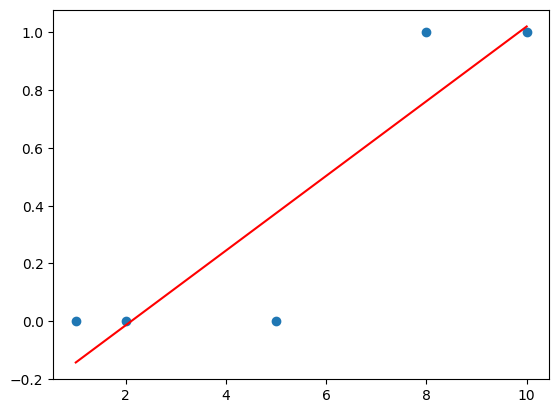

In [202]:
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값

from scipy import stats
lm = stats.linregress(x,y) # 기울기(W)와 y절편(b)

H = lm[0]*x + lm[1]

import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

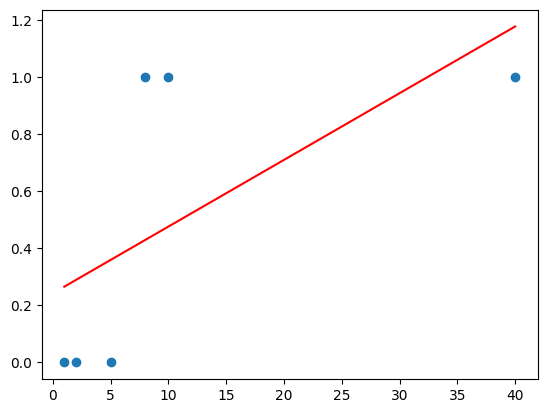

In [208]:
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1]) # 실제값

from scipy import stats
lm = stats.linregress(x,y) # 기울기(W)와 y절편(b)

H = lm[0]*x + lm[1]

import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

In [250]:
# 교안 50page
X_data = np.array([[10, 0], [8, 1], [3, 3], [2, 3], [5, 1], [2, 0], [1, 0]])
y_data = np.array([[1], [1], [1], [1], [0], [0], [0]])

X_data.shape
# tensorflow 구현 (tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weighr, bias
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b  # H = X@W + b
# Sigmoid
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 8001):
    
    _, cost_val = sess.run([train, cost], feed_dict={X: X_data, y: y_data})
    if step % 800 == 0:
        print(f'{step}번째 cost : {cost_val}')

800번째 cost : 0.29811525344848633
1600번째 cost : 0.2728879749774933
2400번째 cost : 0.2551293671131134
3200번째 cost : 0.24153372645378113
4000번째 cost : 0.23061396181583405
4800번째 cost : 0.22152434289455414
5600번째 cost : 0.21374738216400146
6400번째 cost : 0.20694886147975922
7200번째 cost : 0.20090307295322418
8000번째 cost : 0.1954517513513565


In [251]:
# 모델 사용
input_data = np.array([[5, 2]])
predict = tf.cast(H>=0.5, dtype=tf.float32)

sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

In [254]:
# accuracy
correct = tf.equal(predict, y)

sess.run(correct, feed_dict={X:X_data, 
                             y:y_data})

accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data, y:y_data}))

모델 정확도 : 0.85714287


# 4. XOR


In [271]:
X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 독립변수 2개, 종속변수 1개 W,b
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# H
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#sess
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 7001):
    _, cost_val = sess.run([train, cost], feed_dict={X: X_data, y: y_data})
    if step % 1000 == 0:
        print(f'{step}번째 cost : {cost_val}')


1000번째 cost : 0.7199892997741699
2000번째 cost : 0.7050159573554993
3000번째 cost : 0.6984618902206421
4000번째 cost : 0.6955382227897644
5000번째 cost : 0.6942273378372192
6000번째 cost : 0.6936367154121399
7000번째 cost : 0.6933695077896118


In [272]:
# accuracy
predict = tf.cast(H >= 0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X: X_data, y: y_data})

accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X: X_data, y: y_data}))

모델 정확도 : 0.75


# 5. Deep Learning XOR 예제

In [273]:
X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)


################ 변경 부분 전 ################ 
# 독립변수 2개, 종속변수 1개 W,b
# W = tf.Variable(tf.random_normal([2, 1]))
# b = tf.Variable(tf.random_normal([1]))

# H
# logits = tf.matmul(X, W) + b
# H = tf.sigmoid(logits)
################ 변경 부분 전 ################ 

################ 변경 부분 (공식이 많아질...) ################ 

## layer1 : (입력2개, 출력4개)
W1 = tf.Variable(tf.random_normal([2, 4]))
b1 = tf.Variable(tf.random_normal([4]))

# H
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)


## layer2 : (입력4개, 출력1개)
W2 = tf.Variable(tf.random_normal([4, 1]))
b2 = tf.Variable(tf.random_normal([1]))

# H
logits = tf.matmul(layer1, W2) + b2

H = tf.sigmoid(logits)

################ 변경 부분 (공식이 많아질...) ################ 

# cost 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#sess
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 7001):
    _, cost_val = sess.run([train, cost], feed_dict={X: X_data, y: y_data})
    if step % 1000 == 0:
        print(f'{step}번째 cost : {cost_val}')


1000번째 cost : 0.44983094930648804
2000번째 cost : 0.2998769283294678
3000번째 cost : 0.18022215366363525
4000번째 cost : 0.11073201894760132
5000번째 cost : 0.07327849417924881
6000번째 cost : 0.05208522826433182
7000번째 cost : 0.03918124735355377


In [276]:
# accuracy
predict = tf.cast(H >= 0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X: X_data, y: y_data})

accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X: X_data, y: y_data}))

모델 정확도 : 1.0


## layer층 x_data 2개 → 4개 → 1개을

## layer층 x_data 2개 → 10개 → 20개 → 10개 → 1개
-            입력층   →     hidden(reiu)     →      출력층(sigmoid)

In [291]:
X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)


## layer1 : (입력2개, 출력10개)
W1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))

# H(relu)
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

## layer2 : (입력10개, 출력20개)
W2 = tf.Variable(tf.random_normal([10, 20]))
b2 = tf.Variable(tf.random_normal([20]))

# H(relu)
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

## layer3 : (입력20개, 출력10개)
W3 = tf.Variable(tf.random_normal([20, 10]))
b3 = tf.Variable(tf.random_normal([10]))

# H(relu)
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)


## layer4 : (입력10개, 출력1개)
W4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([1]))

# H (sigmoid)
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)
# H = tf.nn.softmax(logits)

################ 변경 부분 (공식이 많아질...) ################ 

# cost 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#sess
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 300):
    _, cost_val = sess.run([train, cost], feed_dict={X: X_data, y: y_data})
    if step % 50 == 0:
        print(f'{step}번째 cost_val : {cost_val}')

50번째 cost_val : 0.04435167461633682
100번째 cost_val : 0.027512915432453156
150번째 cost_val : 0.019704632461071014
200번째 cost_val : 0.016149550676345825
250번째 cost_val : 0.013609858229756355


In [285]:
# accuracy
predict = tf.cast(H >= 0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X: X_data, y: y_data})

accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X: X_data, y: y_data}))

모델 정확도 : 1.0
